In [14]:
import numpy as np 
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist       # calculate the distance matrix
from sklearn.preprocessing import MinMaxScaler
from scipy import stats # the mode method (the most frequent)
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import mode

In [2]:
# load the extrapolated pattern about all the speaker 
female_spk_audio = np.load('../female_audio_train_100.npy',allow_pickle=True)
male_spk_audio = np.load('../male_audio_train_100.npy',allow_pickle=True)
for i in range(len(female_spk_audio)):
    print("spk:",i, female_spk_audio[i].shape, type(female_spk_audio[i]))
print(" ")
for i in range(len(male_spk_audio)):
    print("spk:",i+10, male_spk_audio[i].shape, type(male_spk_audio[i]))

spk: 0 (632, 13) <class 'numpy.ndarray'>
spk: 1 (433, 13) <class 'numpy.ndarray'>
spk: 2 (642, 13) <class 'numpy.ndarray'>
spk: 3 (1010, 13) <class 'numpy.ndarray'>
spk: 4 (751, 13) <class 'numpy.ndarray'>
spk: 5 (781, 13) <class 'numpy.ndarray'>
spk: 6 (402, 13) <class 'numpy.ndarray'>
spk: 7 (657, 13) <class 'numpy.ndarray'>
spk: 8 (536, 13) <class 'numpy.ndarray'>
spk: 9 (532, 13) <class 'numpy.ndarray'>
 
spk: 10 (575, 13) <class 'numpy.ndarray'>
spk: 11 (867, 13) <class 'numpy.ndarray'>
spk: 12 (842, 13) <class 'numpy.ndarray'>
spk: 13 (413, 13) <class 'numpy.ndarray'>
spk: 14 (538, 13) <class 'numpy.ndarray'>
spk: 15 (316, 13) <class 'numpy.ndarray'>
spk: 16 (432, 13) <class 'numpy.ndarray'>
spk: 17 (824, 13) <class 'numpy.ndarray'>
spk: 18 (634, 13) <class 'numpy.ndarray'>
spk: 19 (758, 13) <class 'numpy.ndarray'>


In [3]:
print(np.mean(female_spk_audio[0], axis=0)) # old mean

[-4.89429310e+02  1.04486141e+02 -1.07256526e+01 -1.00589376e+00
 -9.77565500e-02 -1.62138574e+01 -1.09418236e+01 -2.95225600e+00
 -6.22924931e+00 -2.75397037e+00 -6.74733009e+00 -2.88015586e+00
 -3.57069328e+00]


In [4]:
# normalize the features for each speaker
scaler = StandardScaler()
female_spk_audio_normalized = []
male_spk_audio_normalized = []
for i in range(len(female_spk_audio)):    
    female_spk_audio_normalized.append(scaler.fit_transform(female_spk_audio[i]))
    male_spk_audio_normalized.append(scaler.fit_transform(male_spk_audio[i]))


In [5]:
print(np.mean(female_spk_audio_normalized[0], axis=0))  # new mean

[-2.33572831e-16 -3.77335294e-16  1.44047924e-17 -3.58363128e-17
 -6.09568654e-17  4.49710592e-17  8.72631784e-17 -2.35922393e-16
 -6.95646072e-17  4.04476031e-17 -5.25247918e-17 -1.26481104e-17
 -5.41936397e-17]


In [6]:
# apply the "one vs rest" methodology --> creation of the labels
y_labels = np.empty((0))
for spk in range(len(female_spk_audio)):
    y_lable_spk = np.ones(female_spk_audio[spk].shape[0])*spk
    y_labels = np.concatenate((y_labels,y_lable_spk))
print("female labels:",y_labels.shape)

# male labels 
for spk in range(len(male_spk_audio)):
    y_lable_spk = np.ones(male_spk_audio[spk].shape[0])*(spk+10)
    y_labels = np.concatenate((y_labels,y_lable_spk))
y_labels.shape

female labels: (6376,)


(12575,)

In [7]:
## divide all the dataset for training
# train
female_spk_train_data = []
female_spk_train_labels = []
male_spk_train_data = []
male_spk_train_labels = []
# test 
female_spk_test_data = []
female_spk_test_labels = []
male_spk_test_data = []
male_spk_test_labels = []

for i in range(len(female_spk_audio)):
    train, TEST = train_test_split( female_spk_audio_normalized[i], test_size=0.20, random_state=42)
    female_spk_train_data.append(train)
    female_spk_train_labels.append(np.ones(len(train))*i)
    
    female_spk_test_data.append(TEST)
    female_spk_test_labels.append(np.ones(len(TEST))*i)
    
for i in range(len(male_spk_audio)):
    train, TEST = train_test_split( male_spk_audio_normalized[i], test_size=0.20, random_state=42)
    male_spk_train_data.append(train)
    male_spk_train_labels.append(np.ones(len(train))*(i+10))
    
    male_spk_test_data.append(TEST)
    male_spk_test_labels.append(np.ones(len(TEST))*(i+10))


for i in range(len(female_spk_audio)):
    print("spk:",i," - train:", female_spk_train_data[i].shape, " test:", female_spk_test_data[i].shape)
    
for i in range(len(male_spk_audio)):
    print("spk:",i+10," - train:", male_spk_train_data[i].shape, " test:", male_spk_test_data[i].shape)
    
train_audio = np.empty((0,13))
train_labels = np.empty(0)
test_audio = np.empty((0,13))
test_labels = np.empty(0)

for i in range(10):
    train_audio = np.concatenate((train_audio,female_spk_train_data[i]))
    train_labels = np.concatenate((train_labels, female_spk_train_labels[i]))
    
    test_audio = np.concatenate((test_audio,female_spk_test_data[i]))
    test_labels = np.concatenate((test_labels, female_spk_test_labels[i]))
    
for i in range(10):
    train_audio = np.concatenate((train_audio, male_spk_train_data[i]))
    train_labels = np.concatenate((train_labels, male_spk_train_labels[i])) # labels are from 10 to 19
    
    test_audio = np.concatenate((test_audio, male_spk_test_data[i]))
    test_labels = np.concatenate((test_labels, male_spk_test_labels[i])) # labels are from 10 to 19
    
print("data for the train:",train_audio.shape, train_labels.shape)
print("data for the test:", test_audio.shape, test_labels.shape)

spk: 0  - train: (505, 13)  test: (127, 13)
spk: 1  - train: (346, 13)  test: (87, 13)
spk: 2  - train: (513, 13)  test: (129, 13)
spk: 3  - train: (808, 13)  test: (202, 13)
spk: 4  - train: (600, 13)  test: (151, 13)
spk: 5  - train: (624, 13)  test: (157, 13)
spk: 6  - train: (321, 13)  test: (81, 13)
spk: 7  - train: (525, 13)  test: (132, 13)
spk: 8  - train: (428, 13)  test: (108, 13)
spk: 9  - train: (425, 13)  test: (107, 13)
spk: 10  - train: (460, 13)  test: (115, 13)
spk: 11  - train: (693, 13)  test: (174, 13)
spk: 12  - train: (673, 13)  test: (169, 13)
spk: 13  - train: (330, 13)  test: (83, 13)
spk: 14  - train: (430, 13)  test: (108, 13)
spk: 15  - train: (252, 13)  test: (64, 13)
spk: 16  - train: (345, 13)  test: (87, 13)
spk: 17  - train: (659, 13)  test: (165, 13)
spk: 18  - train: (507, 13)  test: (127, 13)
spk: 19  - train: (606, 13)  test: (152, 13)
(10050, 13) (10050,)
(2525, 13) (2525,)


this is the implementation of the k nearest neighbors, I don't use the center of mass for each class but I use a set of points. 

In [8]:
neighbors = list(range(2, 50))
dist = ['euclidean', 'manhattan']

In [9]:
params_grid = [{ 'n_neighbors':neighbors, 'metric':dist }]
knn_model = GridSearchCV(KNeighborsClassifier(), params_grid, cv=10, scoring='f1_macro')
knn_model.fit(train_audio, train_labels)
print('Best score for training data:', knn_model.best_score_)
print('Best n of neighbors:',knn_model.best_estimator_.n_neighbors)
print('Best metric:',knn_model.best_estimator_.metric)

Best score for training data: 0.4618933514696638
Best n of neighbors: 8
Best metric: euclidean


In [10]:
dist = 'euclidean'
my_accuracy_score = []
skl_accuracy_score = []
check_vector=[7,8,9,10,11,12,13,14,15,16,17]
for K in check_vector:
    # my KNN
    distance_matrix = cdist(train_audio, test_audio, metric=dist) # compare the distance between each points and all test points
    neighbors = np.argsort(distance_matrix, axis=0) # return the index in incremental order (trainxtest) (index)
    K_neighbors = neighbors[:K, :] # take only the first k-th train elements x test values
    neighbors_labels = train_labels[K_neighbors]
    prediction = stats.mode(neighbors_labels, axis=0)[0] # find the most frequent label
    accuracy = np.sum(prediction==test_labels)/len(test_labels)
    my_accuracy_score.append(accuracy)
    # sklearn
    knn = KNeighborsClassifier(n_neighbors=K, metric=dist)
    knn.fit(train_audio, train_labels)
    skl_accuracy_score.append(knn.score(test_audio, test_labels))    

best result: my knn  5 - 0.4986138613861386  - sklearn knn  0.4986138613861386


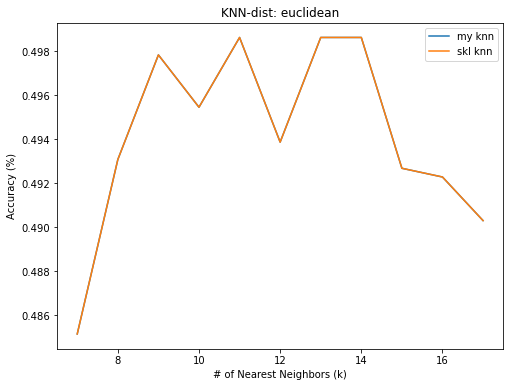

In [11]:
# Plot the results 
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("KNN-dist: euclidean")
ax.plot(check_vector, my_accuracy_score, label= "my knn")
ax.plot(check_vector, skl_accuracy_score, label= "skl knn")
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');
ax.legend()
print("best result: my knn ", np.argmax(my_accuracy_score)+1,"-",np.max(my_accuracy_score), " - sklearn knn ", np.max(skl_accuracy_score))

In [12]:
# my KNN
K=9 # best value
dist = 'euclidean'
distance_matrix = cdist(train_audio, test_audio, metric=dist) # compare the distance between each points and all test points
neighbors = np.argsort(distance_matrix, axis=0) # return the index in incremental order (trainxtest) (index)
K_neighbors = neighbors[:K, :] # take only the first k-th train elements x test values
neighbors_labels = train_labels[K_neighbors]
prediction = stats.mode(neighbors_labels, axis=0)[0] # find the most frequent label
prediction = prediction.T
prediction.shape

(2525, 1)

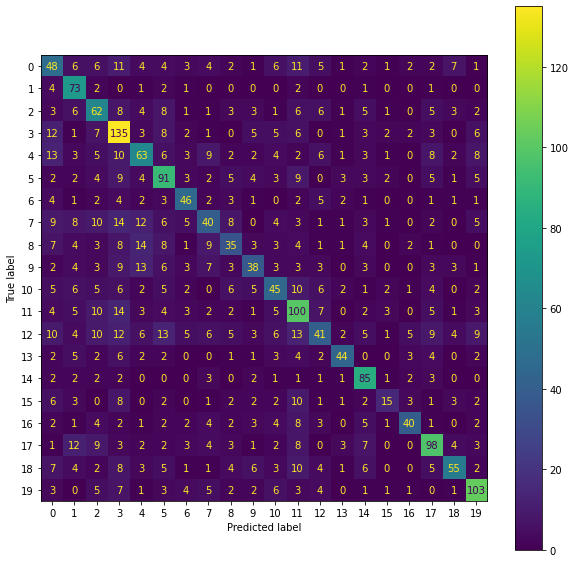

In [15]:
# about pattern of 1s
conf_matrix = confusion_matrix(test_labels, prediction)
cmp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.arange(20))
fig, ax = plt.subplots(figsize=(10, 10)) 
cmp.plot(ax=ax)
plt.grid(False)
plt.show()

In [16]:
accuracy =  np.sum(conf_matrix.diagonal())/np.sum(conf_matrix) 

precision = []
recall = []
for i in range(20):
    diag = conf_matrix[i,i]
    precision.append(diag/np.sum(conf_matrix[:,i]))
    recall.append(diag/np.sum(conf_matrix[i,:]))

precision = np.mean(np.asarray(precision))
recall  = np.mean(np.asarray(recall))

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Classifier precision: ' + "{0:.2f}".format(precision))
print('Classifier recall: ' + "{0:.2f}".format(recall))

Classifier accuracy: 49.78%
Classifier precision: 0.50
Classifier recall: 0.49


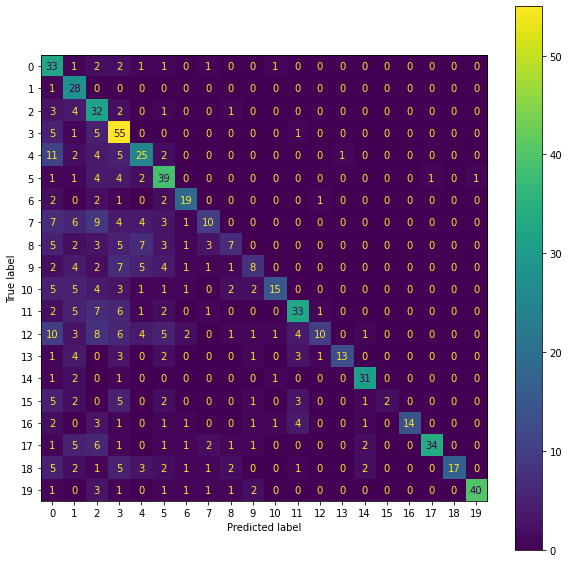

In [17]:
# about pattern of 3s
predicted_3 = []
test_3 = []
chuncks_pred = np.array_split(prediction, len(prediction)/3, axis=0)
chuncks_test = np.array_split(test_labels, len(test_labels)/3, axis=0)
for i in range(len(chuncks_pred)):
    predicted_3.append(int(mode(chuncks_pred[i], axis=0)[0]))
    test_3.append(int(mode(chuncks_test[i], axis=0)[0]))
conf_matrix = confusion_matrix(test_3, predicted_3)
cmp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.arange(20))
fig, ax = plt.subplots(figsize=(10, 10)) 
cmp.plot(ax=ax)
plt.grid(False)
plt.show()

In [18]:
accuracy =  np.sum(conf_matrix.diagonal())/np.sum(conf_matrix) 

precision = []
recall = []
for i in range(20):
    diag = conf_matrix[i,i]
    precision.append(diag/np.sum(conf_matrix[:,i]))
    recall.append(diag/np.sum(conf_matrix[i,:]))

precision = np.mean(np.asarray(precision))
recall  = np.mean(np.asarray(recall))

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Classifier precision: ' + "{0:.2f}".format(precision))
print('Classifier recall: ' + "{0:.2f}".format(recall))

Classifier accuracy: 55.29%
Classifier precision: 0.67
Classifier recall: 0.54


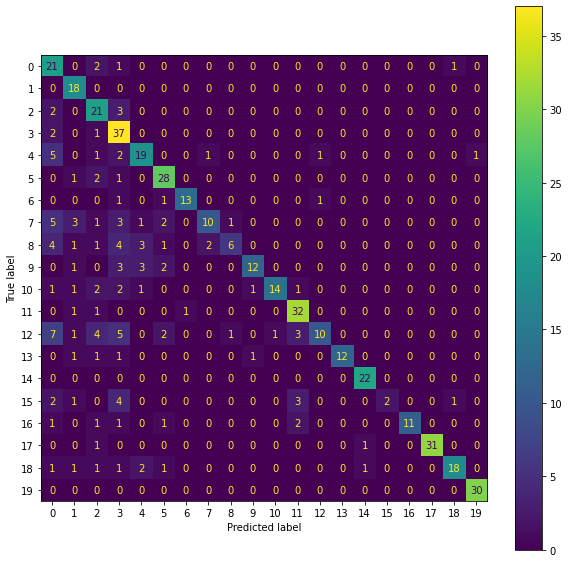

In [21]:
# about pattern of 5s
predicted_5 = []
test_5 = []
chuncks_pred = np.array_split(prediction, len(prediction)/5, axis=0)
chuncks_test = np.array_split(test_labels, len(test_labels)/5, axis=0)
for i in range(len(chuncks_pred)):
    predicted_5.append(int(mode(chuncks_pred[i], axis=0)[0]))
    test_5.append(int(mode(chuncks_test[i], axis=0)[0]))
conf_matrix = confusion_matrix(test_5, predicted_5)
cmp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.arange(20))
fig, ax = plt.subplots(figsize=(10, 10)) 
cmp.plot(ax=ax)
plt.grid(False)
plt.show()

In [20]:
accuracy =  np.sum(conf_matrix.diagonal())/np.sum(conf_matrix) 

precision = []
recall = []
for i in range(20):
    diag = conf_matrix[i,i]
    precision.append(diag/np.sum(conf_matrix[:,i]))
    recall.append(diag/np.sum(conf_matrix[i,:]))

precision = np.mean(np.asarray(precision))
recall  = np.mean(np.asarray(recall))

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Classifier precision: ' + "{0:.2f}".format(precision))
print('Classifier recall: ' + "{0:.2f}".format(recall))

Classifier accuracy: 72.67%
Classifier precision: 0.81
Classifier recall: 0.71
